In [3]:
import pandas as pd 

In [5]:
sample_ligands = pd.read_csv('../data/sample_ligands.csv', index_col=False)

In [9]:
ligand = sample_ligands['canonical_SMILES'].sample(1).values.tolist()[0]
ligand

'N[C@H]1C[C@@H](N2Cc3cnc(C4CC4)nc3C2)CC[C@@H]1c1cc(F)c(F)cc1F'

# Introduction to RDKit

## Converting molecules

In [25]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [10]:
m = Chem.MolFromSmiles(ligand) # possible to read from smarts, mol, supplier etc.

In [18]:
Chem.FindMolChiralCenters(m)

[(1, 'S'), (3, 'S'), (18, 'R')]

RDKit provides canonical SMILES

In [19]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')))

c1ccncc1
c1ccncc1
c1ccncc1


In [22]:
print('Not isomeric\t', Chem.MolToSmiles(m, isomericSmiles=False)) 
print('Isomeric\t', Chem.MolToSmiles(m))
Chem.Kekulize(m)
print('Kekulized\t', Chem.MolToSmiles(m, kekuleSmiles=True))

Not isomeric	 NC1CC(N2Cc3cnc(C4CC4)nc3C2)CCC1c1cc(F)c(F)cc1F
Isomeric	 N[C@H]1C[C@@H](N2Cc3cnc(C4CC4)nc3C2)CC[C@@H]1c1cc(F)c(F)cc1F
Kekulized	 N[C@H]1C[C@@H](N2CC3=CN=C(C4CC4)N=C3C2)CC[C@@H]1C1=CC(F)=C(F)C=C1F


*The smiles provided when one requests kekuleSmiles are not canonical*

2D and 3D Coordinates can be generated and stored with the molecule

In [27]:
#AllChem.Compute2DCoords(m)
#print(Chem.MolToMolBlock(m)) 

### Traverse Atoms and Bonds

In [40]:
print('Number of atoms\t\t', m.GetNumAtoms())
print('Bond type\t\t', m.GetBonds()[0].GetBondType())
print('Symbol\t\t\t', m.GetAtomWithIdx(0).GetSymbol())
print('Explicit valence\t', m.GetAtomWithIdx(0).GetExplicitValence())
print('Bond begin atom id\t', m.GetBondWithIdx(0).GetBeginAtomIdx())
print('Bond end atom id\t', m.GetBondWithIdx(0).GetEndAtomIdx())

atom = m.GetAtomWithIdx(0)
print('Atom at the begining:\t', atom.GetSymbol())
print('Atom\'s neighbors\t', [x.GetSymbol() for x in atom.GetNeighbors()])

Number of atoms		 28
Bond type		 SINGLE
Symbol			 N
Explicit valence	 1
Bond begin atom id	 0
Bond end atom id	 1
Atom at the begining:	 N
Atom's neighbors	 ['C']


In [48]:
ri = m.GetRingInfo()
ri.AtomRings()
ri.BondRings()

((27, 17, 16, 15, 2, 1),
 (4, 29, 14, 30, 5),
 (7, 8, 12, 13, 30, 6),
 (10, 31, 11),
 (20, 22, 24, 25, 28, 19))

In [42]:
Chem.GetSSSR(m) # smallest set of smallest rings

5

## Modifying molecules
Normally molecules are stored in the RDKit with the hydrogen atoms implicit (e.g. not explicitly present in the molecular graph. When it is useful to have the hydrogens explicitly present, for example when generating or optimizing the 3D geometry

In [49]:
m2 = Chem.AddHs(m)
m2.GetNumAtoms()

51

RDKit molecules are usually stored with the bonds in aromatic rings having aromatic bond types. This can be changed with the rdkit.Chem.rdmolops.Kekulize() function:

In [53]:
m2 = Chem.MolFromSmiles('c1ccccc1')
print(m2.GetBondWithIdx(0).GetBondType())
Chem.Kekulize(m2)
print(m2.GetBondWithIdx(0).GetBondType())

AROMATIC
DOUBLE


Bonds can be restored to the aromatic bond type using the rdkit.Chem.rdmolops.SanitizeMol() function:

In [55]:
Chem.SanitizeMol(m2)
m2.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

## Drawing molecules

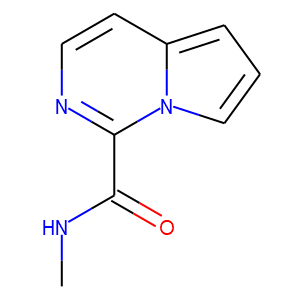

In [58]:
 Chem.Draw.MolToImage(m)  

## Substructure Searching
Substructure matching can be done using query molecules built from SMARTS or SMILES

In [91]:
m = Chem.MolFromSmiles('c1ccccc1O')
patt = Chem.MolFromSmarts('ccO')
print(m.HasSubstructMatch(patt))
print(m.GetSubstructMatches(patt))
print(m.HasSubstructMatch(Chem.MolFromSmiles('COC')))

True
((0, 5, 6), (4, 5, 6))
False


By default information about stereochemistry is not used in substructure searches. But this can be changed via the useChirality argument.

In [94]:
m = Chem.MolFromSmiles('CC[C@H](F)Cl')
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl')))
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'), useChirality=True))

True
False


### Substructure-based transformations
DeleteSubstructs, ReplaceSubstructs

## Murcko Scaffolds

In [95]:
from rdkit.Chem.Scaffolds import MurckoScaffold

In [106]:
another_ligand = sample_ligands['canonical_SMILES'].sample(1).values.tolist()[0]
m = Chem.MolFromSmiles(another_ligand)
print('Ligand', another_ligand)
core = MurckoScaffold.GetScaffoldForMol(m)
Chem.MolToSmiles(core)

Ligand O=S(=O)(Nc1ncns1)c1ccc2c(c1)OCCN2c1ccc(C(F)(F)F)cc1-c1cn[nH]c1


'O=S(=O)(Nc1ncns1)c1ccc2c(c1)OCCN2c1ccccc1-c1cn[nH]c1'

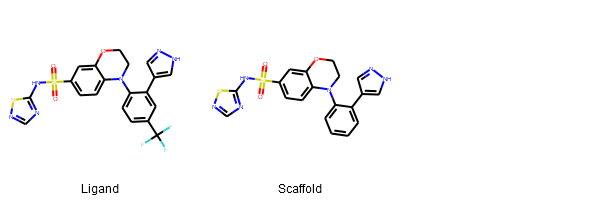

In [107]:
 Chem.Draw.MolsToGridImage([m, core],  legends=['Ligand', 'Scaffold'])

### Maximum Common Substructure

In [109]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mols = [mol1,mol2,mol3]
res=rdFMCS.FindMCS(mols)
res.numAtoms, res.numBonds, res.smartsString

(10, 10, '[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]')

### Fingerprinting and Molecular Similarity¶

#### Topological Fingerprints

In [115]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]
fps = [Chem.RDKFingerprint(x) for x in ms]
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.6

#### Morgan (Circular Fingerprints)

In [114]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1 = AllChem.GetMorganFingerprint(m1,2)
m2 = Chem.MolFromSmiles('Cc1ncccc1')
fp2 = AllChem.GetMorganFingerprint(m2,2)
DataStructs.DiceSimilarity(fp1,fp2)

0.55

#### Drawing images of fingerprints
The default highlight colors for the Morgan bits indicate:
    
    blue: the central atom in the environment

    yellow: aromatic atoms

    gray: aliphatic ring atoms

The default highlight colors for the RDKit bits indicate:

    yellow: aromatic atoms

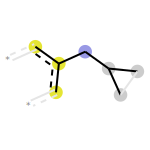

In [123]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
mfp2_svg

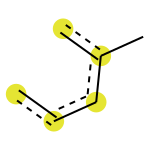

In [125]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)
rdk_svg

## Descriptors
https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors

In [126]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
Descriptors.TPSA(m), Descriptors.MolLogP(m)

(37.3, 1.3848)

### Visualize descriptors
Similarity maps can be used to visualize descriptors that can be divided into atomic contributions.
Crippen contributions to logP is shown in the below figure.

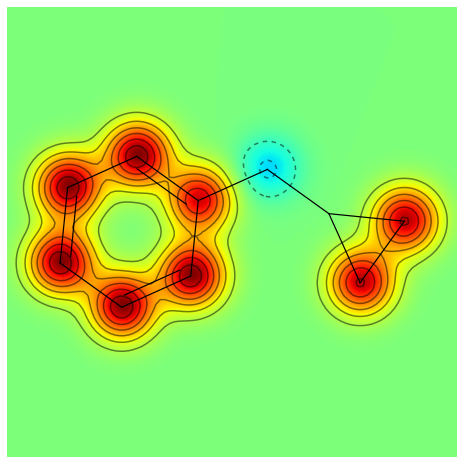

In [128]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, [x for x, y in contribs], colorMap='jet', contourLines=10)

## Fragments

### Recap Implementation
Recap uses a set of chemical transformations mimicking common reactions carried out in the lab in order to decompose a molecule into a series of reasonable fragments.

In [129]:
from rdkit import Chem
from rdkit.Chem import Recap
m = Chem.MolFromSmiles('c1ccccc1OCCOC(=O)CC')
hierarch = Recap.RecapDecompose(m)

In [133]:
ks = hierarch.children.keys()
sorted(ks) # children of root

['*C(=O)CC', '*CCOC(=O)CC', '*CCOc1ccccc1', '*OCCOc1ccccc1', '*c1ccccc1']

In [131]:
ks=hierarch.GetLeaves().keys()
sorted(ks) # fragments at leaves

['*C(=O)CC', '*CCO*', '*CCOc1ccccc1', '*c1ccccc1']

### BRICS Implementation
BRICS provides another method for fragmenting molecules along synthetically accessible bonds

In [134]:
from rdkit.Chem import BRICS
sorted(BRICS.BRICSDecompose(m))

['[1*]C(=O)CC', '[16*]c1ccccc1', '[3*]O[3*]', '[4*]CC[4*]']

### Other fragmentation approaches
Here’s a quick demonstration of using that to break all bonds between atoms in rings and atoms not in rings.

In [136]:
m = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]')) #  finding all the atom pairs
bs = [m.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis] # get corresponding bond indices
nm = Chem.FragmentOnBonds(m,bs)
Chem.MolToSmiles(nm, True)

'*C1CC([4*])C1[6*].[1*]C.[3*]O.[5*]CC[8*].[7*]C1CC1'

## Chemical Features and Pharmacophores

In [138]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [139]:
m = Chem.MolFromSmiles('OCc1ccccc1CN')
feats = factory.GetFeaturesForMol(m)
print(feats[0].GetFamily())
print(feats[0].GetType())
print(feats[0].GetAtomIds())
print(feats[4].GetFamily())
print(feats[4].GetAtomIds())

Donor
SingleAtomDonor
(0,)
Aromatic
(2, 3, 4, 5, 6, 7)
